# Housing Price Prediction
Group 1
* Authors: Albert Zeng, Eleanor Ma
* Submission date: September 13, 2023

## Objectives

**1) Business Problem:**
In this case, the business problem is to predict the sale price of houses based on various features and understand the factors that influence house prices in the real-estate market. 
Business context: Real estate agencies or investors might use this analysis to make informed decisions about property investments.

**2) Data Preprocessing:**
Handle missing values in columns like "Sale Price", "No of Bathrooms", "Flat Area (in Sqft)", etc. using techniques like data removal. Check for and address outliers that might affect the accuracy of price predictions. Ensure data quality by verifying the consistency and correctness of data entries. Do encoding operation, make sure the data is numeric and we can perform linear regression.

**3) Exploratory Data Analysis (EDA):**
Visualize the data with histograms, scatter plots, and correlation matrices to understand relationships between variables. 
Calculate summary statistics to get an overview of the dataset's characteristics.

**4) Feature Selection:**
Identify relevant features for predicting sale prices (e.g., "No of Bedrooms", "No of Bathrooms", "Flat Area (in Sqft)", "Condition of the House", etc.).Create new features if needed, like the age of the house since renovation.

**5) Model Selection:**
Depending on the nature of the prediction task (regression), we can consider linear regression, using different feature selection strategy. Ensure that the assumptions of the selected model are met, such as linearity, independency, normality of residuals, and homoscedasticity.

**6) Model Training:**
Split the dataset into training and testing sets to train and evaluate the model's performance.

**7) Pattern Discovery:**
In this regression problem, pattern discovery mainly involves understanding how independent variables (features) influence the sale price.

**8) Model Evaluation:**
Evaluate the regression model's performance using metrics like Root Mean Squared Error (RMSE), Adjust R-squared, R-squared and Cross Validation to measure how well it predicts sale prices.

**9) Interpretation and Application:**
Interpret the model's coefficients to understand the impact of each feature on the sale price. Use the model for predicting house sale prices and inform real estate decisions, such as making investment choices.


## Data Source
Data downloaded from Kaggle:<br>
https://www.kaggle.com/datasets/anmolchopra2012/basics-of-ml?select=1.+Regression+-+Module+-+%28Housing+Prices%29.csv <br>
The dataset comprised 21613 rows and 21 columns with various features related to house characteristics, prices, and other relevant information. 

## Data Preprocessing

### Data Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file
df0 = pd.read_csv("1. Regression - Module - (Housing Prices).csv")
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [3]:
df0.head(2)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639


In [4]:
df0.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,21613.0,4.580302e+09,2.876566e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
Sale Price,21609.0,5.401984e+05,3.673890e+05,75000.00,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
No of Bedrooms,21613.0,3.370000e+00,9.300000e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
No of Bathrooms,21609.0,2.110000e+00,7.700000e-01,0.00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
Flat Area (in Sqft),21604.0,2.079930e+03,9.184900e+02,290.00,1.429250e+03,1.910000e+03,2.550000e+03,1.354000e+04
Lot Area (in Sqft),21604.0,1.510776e+04,4.142827e+04,520.00,5.040000e+03,7.617500e+03,1.068825e+04,1.651359e+06
No of Floors,21613.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
Overall Grade,21613.0,7.620000e+00,1.110000e+00,1.00,7.000000e+00,7.000000e+00,8.000000e+00,1.000000e+01
Area of the House from Basement (in Sqft),21610.0,1.788340e+03,8.279800e+02,290.00,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
Basement Area (in Sqft),21613.0,2.915100e+02,4.425800e+02,0.00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03


In [5]:
for i in df0.select_dtypes(include='object'):
    print(df0[i].name,':', df0[i].nunique())
    print(df0[i].value_counts())
    print("="*30)

Date House was Sold : 13
15 April 2016        2231
14 July 2017         2211
14 June 2017         2180
14 August 2017       1940
14 October 2017      1878
15 March 2016        1875
14 September 2017    1774
14 May 2017          1768
14 December 2017     1471
14 November 2017     1411
15 February 2016     1250
15 January 2016       978
15 May 2016           646
Name: Date House was Sold, dtype: int64
Waterfront View : 2
No     21450
Yes      163
Name: Waterfront View, dtype: int64
No of Times Visited : 5
None      19489
Twice       963
Thrice      510
Once        332
Four        319
Name: No of Times Visited, dtype: int64
Condition of the House : 5
Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64


### Cleaning and Transformation

In [6]:
# check duplicates
df0.duplicated().sum()

0

In [7]:
df0.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [8]:
# dropping null values
df0.dropna(inplace=True)
df0.isnull().sum(axis=1).sum()

0

In [9]:
# extracting Year and Month
df0['Date House was Sold'] = pd.to_datetime(df0['Date House was Sold'])
df0['Year'] = df0['Date House was Sold'].dt.year
df0['Month'] = df0['Date House was Sold'].dt.month

In [10]:
df0['Renovated Year'] = np.where(df0['Renovated Year']>0, df0.Year-df0['Renovated Year'], df0['Age of House (in Years)'])
df0.head(2)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year,Month
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,0,63,63,98178.0,47.5112,-122.257,1340.0,5650,2017,10
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,400,67,26,98125.0,47.7210,-122.319,1690.0,7639,2017,12


In [11]:
# dropping irrelevant columns
df0.drop(columns=['ID','Date House was Sold','Zipcode'], inplace=True)
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21580 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21580 non-null  float64
 1   No of Bedrooms                             21580 non-null  int64  
 2   No of Bathrooms                            21580 non-null  float64
 3   Flat Area (in Sqft)                        21580 non-null  float64
 4   Lot Area (in Sqft)                         21580 non-null  float64
 5   No of Floors                               21580 non-null  float64
 6   Waterfront View                            21580 non-null  object 
 7   No of Times Visited                        21580 non-null  object 
 8   Condition of the House                     21580 non-null  object 
 9   Overall Grade                              21580 non-null  int64  
 10  Area of the House from

## Exploratory Analysis

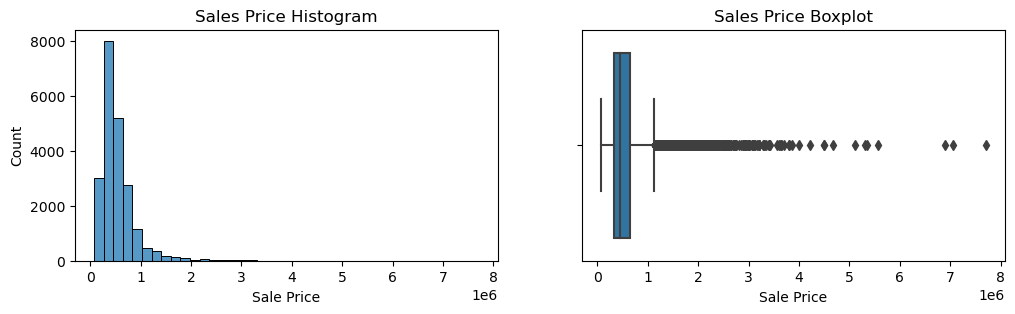

In [12]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.histplot(data=df0, x='Sale Price', bins=40)
plt.title("Sales Price Histogram")
plt.subplot(1,2,2)
sns.boxplot(data=df0, x='Sale Price')
plt.title("Sales Price Boxplot")
plt.show()

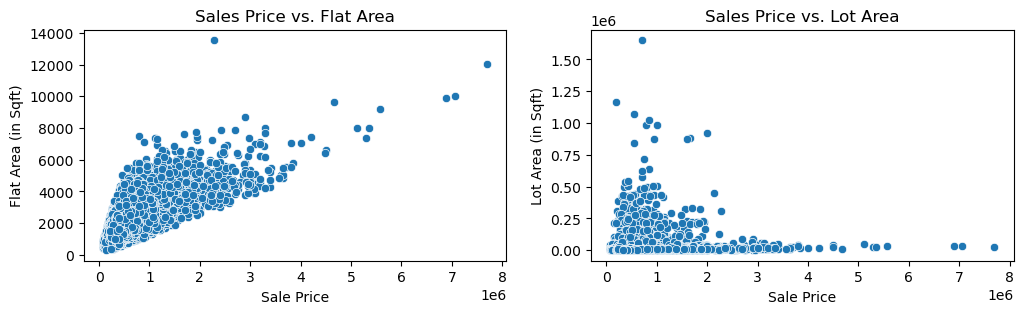

In [13]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.scatterplot(data=df0, x='Sale Price', y='Flat Area (in Sqft)')
plt.title("Sales Price vs. Flat Area")
plt.subplot(1,2,2)
sns.scatterplot(data=df0, x='Sale Price', y='Lot Area (in Sqft)')
plt.title("Sales Price vs. Lot Area")
plt.show()

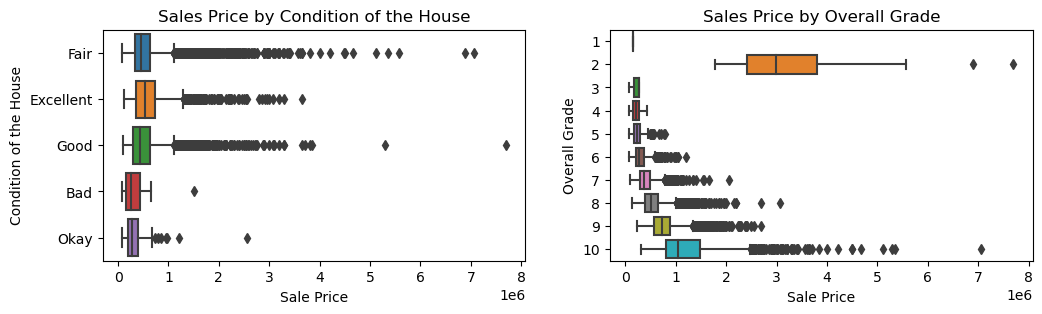

In [14]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(data=df0, x='Sale Price', y='Condition of the House', orient='h')
plt.title("Sales Price by Condition of the House")
plt.subplot(1,2,2)
sns.boxplot(data=df0, x='Sale Price', y='Overall Grade', orient='h')
plt.title("Sales Price by Overall Grade")
plt.show()

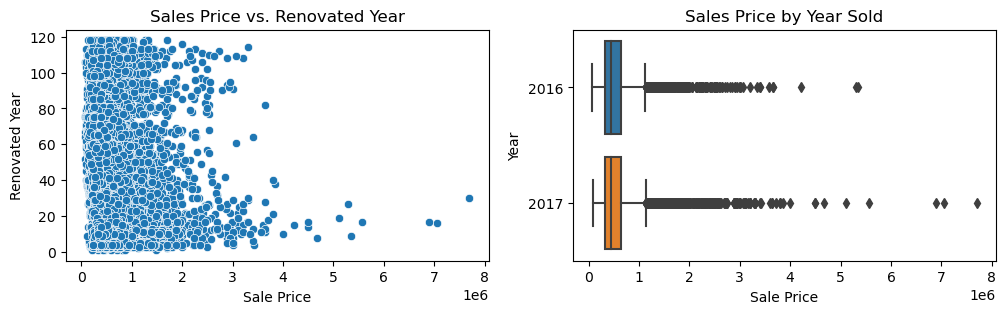

In [15]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.scatterplot(data=df0, x='Sale Price', y='Renovated Year')
plt.title("Sales Price vs. Renovated Year")
plt.subplot(1,2,2)
sns.boxplot(data=df0, x='Sale Price', y='Year', orient='h')
plt.title("Sales Price by Year Sold")
plt.show()

## Modeling

### Model 1 - without feature selection

Linear regression base model without any feature selection methods.

#### Encoding

In [16]:
df = df0.copy()
df['Waterfront View'] = df['Waterfront View'].map({'No':0,'Yes':1}).astype('uint8')
df['No of Times Visited'] = df['No of Times Visited'].map({'None':0,'Once':1,'Twice':2,'Thrice':3,'Four':4}).astype('uint8')
df['Condition of the House'] = df['Condition of the House'].map({'Bad':0,'Okay':1,'Fair':2,'Good':3,'Excellent':4}).astype('uint8')
df.shape

(21580, 20)

#### Outliers

In [17]:
# removing outliers by LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor
x = df.drop(columns='Sale Price')
y = df['Sale Price']
lof = LocalOutlierFactor(n_neighbors=20)
res = lof.fit_predict(x)
x_clean = x[res !=-1]
y_clean = y[res !=-1]
df = pd.concat([x_clean,y_clean], axis=1)
df.shape

(21263, 20)

<Axes: xlabel='Sale Price', ylabel='Overall Grade'>

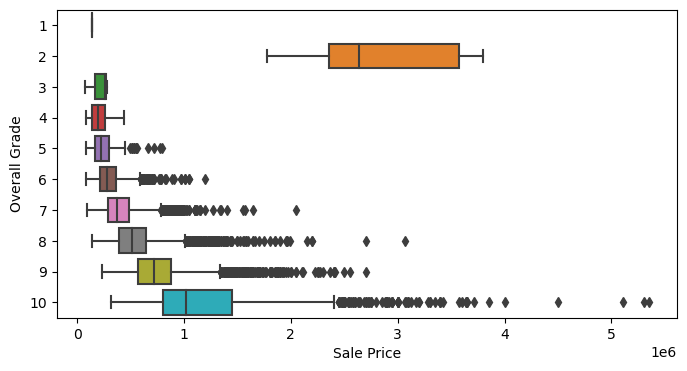

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Sale Price', y='Overall Grade', orient='h')

In [19]:
# removing outliers in Overall Grade 2
df.drop(index=df.loc[df['Overall Grade']==2].index, inplace=True)
df.shape

(21257, 20)

In [20]:
df.quantile([0,.001,.01,.25,.5,.75,.99,.999,1]).round(2).T

,0.000,0.001,0.010,0.250,0.500,0.750,0.990,0.999,1.000
No of Bedrooms,0.00,1.00,2.00,3.00,3.00,4.00,6.00,7.74,33.00
No of Bathrooms,0.00,0.75,1.00,1.50,2.25,2.50,4.25,5.25,7.50
Flat Area (in Sqft),290.00,550.00,720.00,1420.00,1910.00,2540.00,4790.00,6397.44,8010.00
Lot Area (in Sqft),572.00,737.02,1020.00,5050.00,7617.00,10625.00,191611.24,423392.05,542322.00
No of Floors,1.00,1.00,1.00,1.00,1.50,2.00,3.00,3.00,3.50
Waterfront View,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
No of Times Visited,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00,4.00
Condition of the House,0.00,0.00,2.00,2.00,2.00,3.00,4.00,4.00,4.00
Overall Grade,1.00,4.00,5.00,7.00,7.00,8.00,10.00,10.00,10.00
Area of the House from Basement (in Sqft),290.00,532.56,700.00,1190.00,1560.00,2200.00,4270.00,5575.30,7850.00


In [21]:
# removing extreme No of Bedrooms
df.drop(index=df.loc[df['No of Bedrooms']>7].index, inplace=True)

# removing extreme Sale Price
df.drop(index=df.loc[df['Sale Price']>df['Sale Price'].quantile(0.99)].index, inplace=True)

df.shape
# last df modification

(21027, 20)

#### Split Training and Testing Set

In [22]:
x = df.drop(columns='Sale Price')
y = np.log(df['Sale Price'])

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16821, 19) (4206, 19) (16821,) (4206,)


#### Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x.columns, index=y_train.index)
x_test = sc.transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns, index=y_test.index)

#### Model Training

In [25]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(x_train,y_train)
lrm.score(x_train,y_train)

0.7518945040963733

In [26]:
from sklearn.model_selection import cross_val_score
crossvalidation = cross_val_score(lrm, x_train, y_train, cv=5, n_jobs=-1)
crossvalidation

array([0.75173877, 0.74387778, 0.74652031, 0.75785781, 0.75544119])

In [27]:
y_pred = lrm.predict(x_train)

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_train, y_pred)
r2_adj = ((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2_score(y_train, y_pred))
rmse = mean_squared_error(y_train, y_pred, squared=False)

print("R2 :", r2)
print("R2-adjusted :", r2_adj)
print("RMSE :", rmse)

R2 : 0.7518945040963733
R2-adjusted : 0.24838607470382726
RMSE : 0.24715648733036988


In [28]:
y_pred_test = lrm.predict(x_test)

r2_test = r2_score(y_test, y_pred_test)
r2_adj_test = ((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2_score(y_test, y_pred_test))
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("R2 test :", r2_test)
print("R2-adjusted test :", r2_adj_test)
print("RMSE test :", rmse_test)

R2 test : 0.747007026434862
R2-adjusted test : 0.2541412933209281
RMSE test : 0.24562931857021625


In [29]:
def LR_model_results(name,x_train,y_train,x_test,y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_squared_error, r2_score
    
    lrm = LinearRegression()
    lrm.fit(x_train,y_train)
    crossval = cross_val_score(lrm, x_train, y_train, cv=5, n_jobs=-1)
    y_pred = lrm.predict(x_train)
    y_pred_test = lrm.predict(x_test)
    
    r2 = r2_score(y_train, y_pred)
    r2_adj = 1-((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))*(1-r2)
    rmse = mean_squared_error(y_train, y_pred, squared=False)
    r2_test = r2_score(y_test, y_pred_test)
    r2_adj_test = 1-((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))*(1-r2_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

    entry = {"Features":[x_train.shape[1]], "R2":[r2], "Adj_R2":[r2_adj], "RMSE":[rmse], 
             "R2 Test":[r2_test], "Adj_R2 Test":[r2_adj_test], "RMSE Test":[rmse_test], 
             "CrossVal Mean":[crossval.mean()], "CrossVal 1":[crossval[0]], "CrossVal 2":[crossval[1]], 
             "CrossVal 3":[crossval[2]], "CrossVal 4":[crossval[3]], "CrossVal 5":[crossval[4]]}
    
    return pd.DataFrame(entry, index=[name]) , y_pred

In [30]:
Result1 = LR_model_results("1.Base Model",x_train,y_train,x_test,y_test)
Result1[0]

,Features,R2,Adj_R2,RMSE,R2 Test,Adj_R2 Test,RMSE Test,CrossVal Mean,CrossVal 1,CrossVal 2,CrossVal 3,CrossVal 4,CrossVal 5
1.Base Model,19,0.751895,0.751614,0.247156,0.747007,0.745859,0.245629,0.751087,0.751739,0.743878,0.74652,0.757858,0.755441


### Model 2 - pairwise correlation

Feature selection on base model by filtering pairwise correlation.

#### Collinearity

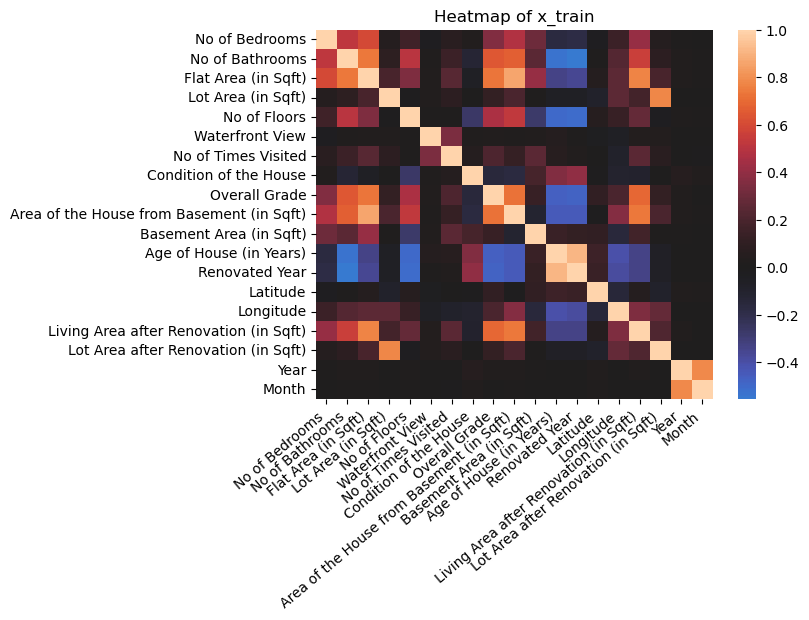

In [31]:
sns.heatmap(x_train.corr(), center=0)
plt.xticks(rotation=40, ha='right')
plt.title("Heatmap of x_train")
plt.show()

In [32]:
s = df.drop(columns='Sale Price').corr().unstack()
s[(abs(s)>0.6) & (s<1)].sort_values(ascending=False)

Renovated Year                             Age of House (in Years)                      0.908450
Age of House (in Years)                    Renovated Year                               0.908450
Flat Area (in Sqft)                        Area of the House from Basement (in Sqft)    0.864305
Area of the House from Basement (in Sqft)  Flat Area (in Sqft)                          0.864305
Month                                      Year                                         0.782455
Year                                       Month                                        0.782455
Lot Area after Renovation (in Sqft)        Lot Area (in Sqft)                           0.768948
Lot Area (in Sqft)                         Lot Area after Renovation (in Sqft)          0.768948
Flat Area (in Sqft)                        Living Area after Renovation (in Sqft)       0.764448
Living Area after Renovation (in Sqft)     Flat Area (in Sqft)                          0.764448
Area of the House from Basemen

In [33]:
df1 = df.drop(columns='Sale Price').copy()
s = df1.corr().unstack()
drop_cor = s[(abs(s)>0.6) & (s<1)].sort_values(ascending=False)
while drop_cor.count()>0:
    col = drop_cor.idxmax()[1]
    df1 = df1.drop(columns=col)
    print("Dropped",col,":",drop_cor.max())
    s = df1.corr().unstack()
    drop_cor = s[(abs(s)>0.6) & (s<1)].sort_values(ascending=False)
df1.shape

Dropped Age of House (in Years) : 0.9084502934488663
Dropped Flat Area (in Sqft) : 0.8643053366181238
Dropped Month : 0.7824545047115563
Dropped Lot Area after Renovation (in Sqft) : 0.7689478679654014
Dropped Living Area after Renovation (in Sqft) : 0.7369531526186945
Dropped Area of the House from Basement (in Sqft) : 0.7277876414079025
Dropped Overall Grade : 0.6452782926834233


(21027, 12)

#### Model Training

In [34]:
col_2 = df1.columns
Result2 = LR_model_results("2.Pairwise Correlation",x_train[col_2],y_train,x_test[col_2],y_test)
Result2[0]

,Features,R2,Adj_R2,RMSE,R2 Test,Adj_R2 Test,RMSE Test,CrossVal Mean,CrossVal 1,CrossVal 2,CrossVal 3,CrossVal 4,CrossVal 5
2.Pairwise Correlation,12,0.572292,0.571987,0.32451,0.578317,0.57711,0.317117,0.571004,0.580052,0.560338,0.55843,0.575776,0.580424


#### Multicollinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(x_train[col_2], i) for i in range(len(col_2))]
for idx, vif in enumerate(VIF):
	print('{0}: {1:.2f}'.format(x_train[col_2].columns[idx], vif))

No of Bedrooms: 1.47
No of Bathrooms: 2.60
Lot Area (in Sqft): 1.09
No of Floors: 1.92
Waterfront View: 1.14
No of Times Visited: 1.24
Condition of the House: 1.25
Basement Area (in Sqft): 1.63
Renovated Year: 2.16
Latitude: 1.08
Longitude: 1.33
Year: 1.01


### Model 3 - VIF filtering

Feature selection on base model by filtering out high VIF value features.

#### Base Model

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
for idx, vif in enumerate(VIF):
	print('{0}: {1:.2f}'.format(x_train.columns[idx], vif))

No of Bedrooms: 1.69
No of Bathrooms: 3.20
Flat Area (in Sqft): inf
Lot Area (in Sqft): 2.53
No of Floors: 2.05
Waterfront View: 1.15
No of Times Visited: 1.33
Condition of the House: 1.25
Overall Grade: 3.04
Area of the House from Basement (in Sqft): inf
Basement Area (in Sqft): inf
Age of House (in Years): 6.09
Renovated Year: 6.37
Latitude: 1.13
Longitude: 1.52
Living Area after Renovation (in Sqft): 3.03
Lot Area after Renovation (in Sqft): 2.56
Year: 2.59
Month: 2.58


C:\Tools\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#### Model Training

In [37]:
def remove_features_VIF(x,threshold=10):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    while max(vif)>threshold:
        m = vif.index(max(vif))
        x_dropped = x.columns[m]
        x = x.drop(columns=x_dropped)
        print("Dropped", x_dropped, ":", max(vif))
        vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    print("="*50)
    VIF = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
    for idx, vif in enumerate(VIF):
    	print('{0}: {1}'.format(x.columns[idx], vif))
    return x.columns
col_3 = remove_features_VIF(x_train,10)

Dropped Flat Area (in Sqft) : inf
No of Bedrooms: 1.6926438803216735
No of Bathrooms: 3.196053308912258
Lot Area (in Sqft): 2.5266192075648704
No of Floors: 2.054875761615907
Waterfront View: 1.1462785951623495
No of Times Visited: 1.3299262237086245
Condition of the House: 1.2524404146218169
Overall Grade: 3.04469141232458
Area of the House from Basement (in Sqft): 4.876641935442961
Basement Area (in Sqft): 2.0312096632668966
Age of House (in Years): 6.088160850951771
Renovated Year: 6.372344731286338
Latitude: 1.1319643881628987
Longitude: 1.5171490272542918
Living Area after Renovation (in Sqft): 3.0322516416093688
Lot Area after Renovation (in Sqft): 2.562581604933904
Year: 2.590338795459308
Month: 2.577974802650188


In [38]:
Result3 = LR_model_results("3.VIF Filtering",x_train[col_3],y_train,x_test[col_3],y_test)
Result3[0]

,Features,R2,Adj_R2,RMSE,R2 Test,Adj_R2 Test,RMSE Test,CrossVal Mean,CrossVal 1,CrossVal 2,CrossVal 3,CrossVal 4,CrossVal 5
3.VIF Filtering,18,0.751978,0.751712,0.247115,0.747429,0.746343,0.245424,0.751112,0.751788,0.743905,0.746581,0.757829,0.755456


### Model 4 - backward P-value elimination

Feature selection on base model by backward P-value elimination.

#### Base Model

In [39]:
# OLS report
import statsmodels.api as sm
model = sm.OLS(y_train,sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2830.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:56:28   Log-Likelihood:                -353.86
No. Observations:               16821   AIC:                             745.7
Df Residuals:                   16802   BIC:                             892.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

#### Backward Elimination

In [40]:
pvalue = max(model.pvalues[1:len(model.pvalues)])
x1 = x_train.copy()
while pvalue>=.05:
    loc = 0
    for i in model.pvalues:
        if i==pvalue:
            feature = model.pvalues.index[loc]
            print(feature, "dropped :", pvalue)
            break
        loc+=1
    x1 = x1.drop(feature, axis=1)
    model = sm.OLS(y_train, sm.add_constant(x1)).fit()
    pvalue = max(model.pvalues[1:len(model.pvalues)])
print(model.summary())

Longitude dropped : 0.08158945645423266
                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2996.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:56:28   Log-Likelihood:                -355.37
No. Observations:               16821   AIC:                             746.7
Df Residuals:                   16803   BIC:                             885.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [41]:
col_4 = x1.columns
Result4 = LR_model_results("4.Backward P-value",x_train[col_4],y_train,x_test[col_4],y_test)
Result4[0]

,Features,R2,Adj_R2,RMSE,R2 Test,Adj_R2 Test,RMSE Test,CrossVal Mean,CrossVal 1,CrossVal 2,CrossVal 3,CrossVal 4,CrossVal 5
4.Backward P-value,18,0.751855,0.75159,0.247176,0.74723,0.746143,0.245521,0.751063,0.75166,0.743878,0.746417,0.757758,0.755601


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(x_train[col_4], i) for i in range(len(col_4))]
for idx, vif in enumerate(VIF):
	print('{0}: {1:.2f}'.format(x_train[col_4].columns[idx], vif))

No of Bedrooms: 1.69
No of Bathrooms: 3.20
Flat Area (in Sqft): inf
Lot Area (in Sqft): 2.51
No of Floors: 2.01
Waterfront View: 1.15
No of Times Visited: 1.32
Condition of the House: 1.25
Overall Grade: 2.97
Area of the House from Basement (in Sqft): inf
Basement Area (in Sqft): inf
Age of House (in Years): 5.97
Renovated Year: 6.34
Latitude: 1.13
Living Area after Renovation (in Sqft): 2.92
Lot Area after Renovation (in Sqft): 2.54
Year: 2.59
Month: 2.58


C:\Tools\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Model 5 - recursive feature elimination

Feature selection on base model by recursive feature elimination.

#### Model Training

In [43]:
from sklearn.feature_selection import RFE

model = LinearRegression()

# List for holding values 
i_list = []
r2_list = []
r2_adj_list=[]
rmse_list = []
cross_val_list = []
feature_list = []

for i in range(1, 10, 1):
    rfe = RFE(model, n_features_to_select = i)
    rfe.fit(x_train, y_train)
    col = x_train.columns[rfe.support_]
    lrm = LinearRegression()
    lrm.fit(x_train[col], y_train)
    crossval = cross_val_score(lrm, x_train[col], y_train, cv=5, n_jobs=-1).mean()

    y_pred = lrm.predict(x_train[col])
    r2 = r2_score(y_train, y_pred)
    r2_adj = 1-((x_train[col].shape[0]-1)/(x_train[col].shape[0]-x_train[col].shape[1]-1))*(1-r2_score(y_train, y_pred))
    rmse = mean_squared_error(y_train, y_pred, squared=False)

    i_list.append(i)
    r2_list.append(r2)
    r2_adj_list.append(r2_adj)
    rmse_list.append(rmse)
    cross_val_list.append(crossval)

    feature = list(set(col)-set(feature_list))[0]
    feature_list.append(feature)
else:
    print("RFE completed.")

RFE completed.


In [44]:
RFE_result = pd.DataFrame({"N Features":i_list,"R2":r2_list,"Adj R2":r2_adj_list,
                           "RMSE":rmse_list,"CrossVal Mean":cross_val_list,"Feature":feature_list})
RFE_result

,N Features,R2,Adj R2,RMSE,CrossVal Mean,Feature
0,1,0.437891,0.437858,0.372018,0.437414,Flat Area (in Sqft)
1,2,0.632654,0.632610,0.300740,0.632318,Latitude
2,3,0.683608,0.683552,0.279104,0.683311,Overall Grade
3,4,0.715688,0.715620,0.264577,0.715417,Age of House (in Years)
4,5,0.721009,0.720926,0.262089,0.720710,Living Area after Renovation (in Sqft)
5,6,0.727280,0.727183,0.259127,0.726978,No of Bathrooms
6,7,0.737320,0.737210,0.254312,0.736984,No of Times Visited
7,8,0.741623,0.741500,0.252221,0.741171,Condition of the House
8,9,0.744911,0.744774,0.250611,0.744355,No of Floors


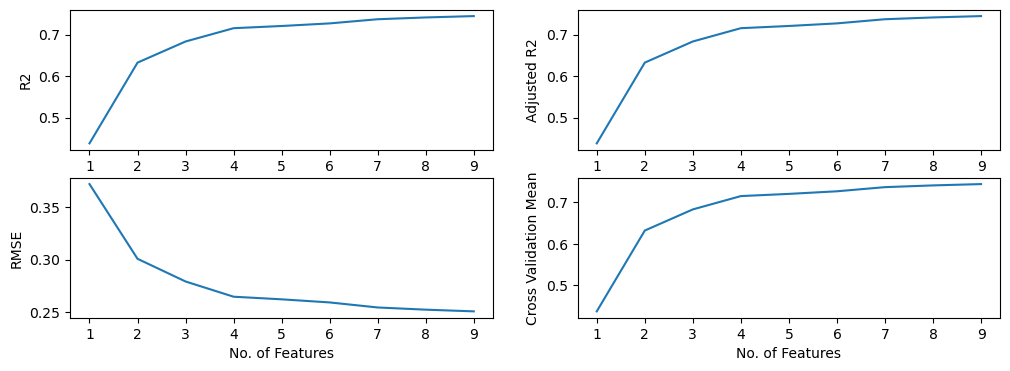

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(2,2,1)
sns.lineplot( x=i_list, y=r2_list)
plt.ylabel("R2")
plt.subplot(2,2,2)
sns.lineplot( x=i_list, y=r2_adj_list)
plt.ylabel("Adjusted R2")
plt.subplot(2,2,3)
sns.lineplot( x=i_list, y=rmse_list)
plt.ylabel("RMSE")
plt.xlabel("No. of Features")
plt.subplot(2,2,4)
sns.lineplot( x=i_list, y=cross_val_list)
plt.ylabel("Cross Validation Mean")
plt.xlabel("No. of Features")
plt.show()

It appears that at 4 features we start to see diminishing return, so we select 1 more at 5 features.

In [46]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select = 5)
rfe.fit(x_train, y_train)
col_5 = x_train.columns[rfe.support_]
print(col_5.values)

['Flat Area (in Sqft)' 'Overall Grade' 'Age of House (in Years)'
 'Latitude' 'Living Area after Renovation (in Sqft)']


In [47]:
Result5 = LR_model_results("5.RFE",x_train[col_5],y_train,x_test[col_5],y_test)
Result5[0]

,Features,R2,Adj_R2,RMSE,R2 Test,Adj_R2 Test,RMSE Test,CrossVal Mean,CrossVal 1,CrossVal 2,CrossVal 3,CrossVal 4,CrossVal 5
5.RFE,5,0.721009,0.720926,0.262089,0.715343,0.715004,0.260548,0.72071,0.719225,0.714954,0.715954,0.730416,0.723001


## Model Evaluation

In [48]:
Result = pd.concat([Result1[0],Result2[0],Result3[0],Result4[0],Result5[0]],axis=0)
Result.round(4)

,Features,R2,Adj_R2,RMSE,R2 Test,Adj_R2 Test,RMSE Test,CrossVal Mean,CrossVal 1,CrossVal 2,CrossVal 3,CrossVal 4,CrossVal 5
1.Base Model,19,0.7519,0.7516,0.2472,0.7470,0.7459,0.2456,0.7511,0.7517,0.7439,0.7465,0.7579,0.7554
2.Pairwise Correlation,12,0.5723,0.5720,0.3245,0.5783,0.5771,0.3171,0.5710,0.5801,0.5603,0.5584,0.5758,0.5804
3.VIF Filtering,18,0.7520,0.7517,0.2471,0.7474,0.7463,0.2454,0.7511,0.7518,0.7439,0.7466,0.7578,0.7555
4.Backward P-value,18,0.7519,0.7516,0.2472,0.7472,0.7461,0.2455,0.7511,0.7517,0.7439,0.7464,0.7578,0.7556
5.RFE,5,0.7210,0.7209,0.2621,0.7153,0.7150,0.2605,0.7207,0.7192,0.7150,0.7160,0.7304,0.7230


In all 5 models we can see the training metrics are similar to the testing metrics, and all cross validations are roughly the same values, indicating there is no overfitting in all 4 models.

Model 1, 3, 4 all have the best performing R2 scores and RMSE, while model 5 is slightly lower in R2 score and slightly higher in RMSE. However, since model 5 uses only 5 features compared to 18 and 19 in the other 3 models, it is the best model among all considering the complexity and performance.

In [49]:
y_pred = Result5[1]
df_result = pd.DataFrame({'Actual':y_train,'Predicted':y_pred})
df_result['Residual'] = df_result['Actual'] - df_result['Predicted']

The assumptions for linear regression will be checked for Model 5.

#### Linearity

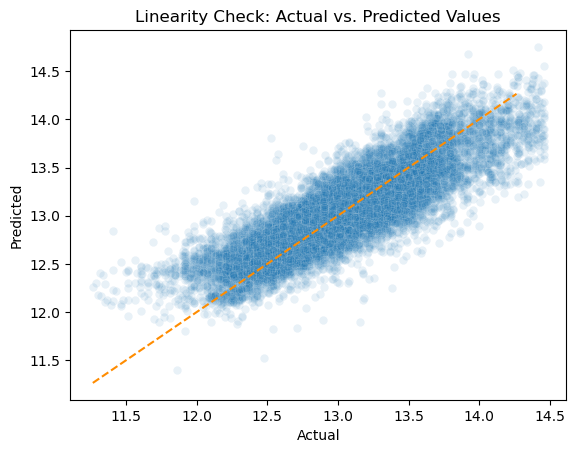

In [50]:
# plot actual vs. predicted y
sns.scatterplot(x=y_train,y=y_pred,alpha=0.1)
line_coords = np.arange(df_result[['Actual','Predicted']].min().min(), df_result[['Actual','Predicted']].max().max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linearity Check: Actual vs. Predicted Values")
plt.show()

Most of the data points are closely distributed around the diagonal line, so the linearity assumption is valid.

### Independence

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(x_train[col_5], i) for i in range(len(col_5))]
for idx, vif in enumerate(VIF):
	print('{0}: {1:.2f}'.format(x_train[col_5].columns[idx], vif))

Flat Area (in Sqft): 2.99
Overall Grade: 2.73
Age of House (in Years): 1.36
Latitude: 1.07
Living Area after Renovation (in Sqft): 2.63


By checking the VIF values for all features used in this model, we can see there is no VIF > 5, indicating that there is no multicollinearity occurring in the selected features of this model.  
The assumption of independency is valid.

### Normality

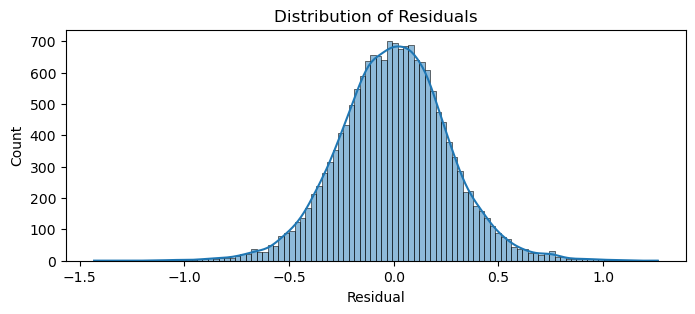

In [52]:
# plot distribution of residuals
plt.figure(figsize=(8,3))
sns.histplot(x=df_result['Residual'], kde=True)
plt.title("Distribution of Residuals")
plt.show()

In [53]:
# Anderson-Darling test for normal distribution
from statsmodels.stats.diagnostic import normal_ad
normal_ad(df_result['Residual'])

(10.74184601298839, 7.238204001463507e-26)

Normal test p-value < 0.05 indicating non-normal distribution.  
Minor violation of normality assumption as there is no substantial violation observed visually from the distribution plot.

### Equal Variances - Homoscedasticity

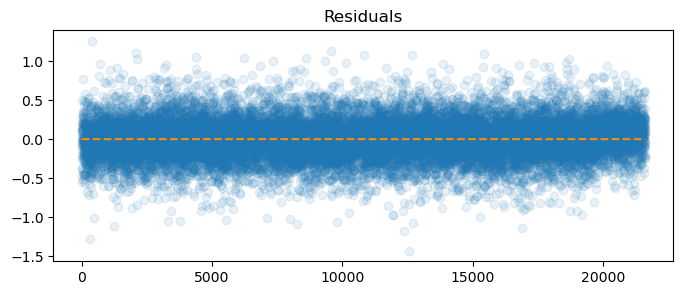

In [54]:
# plot distribution of residuals
plt.figure(figsize=(8,3))
plt.scatter(x=df_result.index, y=df_result.Residual, alpha=0.1)
plt.plot(np.repeat(0, df_result.index.max()), color='darkorange', linestyle='--')
plt.title('Residuals')
plt.show()

There is no visual correlation between the residuals and the predictors. Homoscedasticity is satisfied.

### Autocorrelation

In [55]:
# Durbin-Watson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
durbin_watson(df_result['Residual'])

2.0066573763947266

Durbin-Watson test value is very close to 2, values of 1.5<d<2.5 generally show that there is no autocorrelation in the data.

## Conclusion

Model 5 is considered as the best linear model among the models built. It utilizes 5 features and has a R2 score of 0.72 on both the training and testing set, with no multicollinearity and no overfitting observed. By RFE feature selection we can understand that among all the features, Flat Area, Latitude, Overall Grade, and Age of the House are the most relevant features correlated to the sale price of the house. The minor violation of normality assumption suggests that there may be small inaccuracy in the prediction.